In [3]:
pip install pandas matplotlib openpyxl

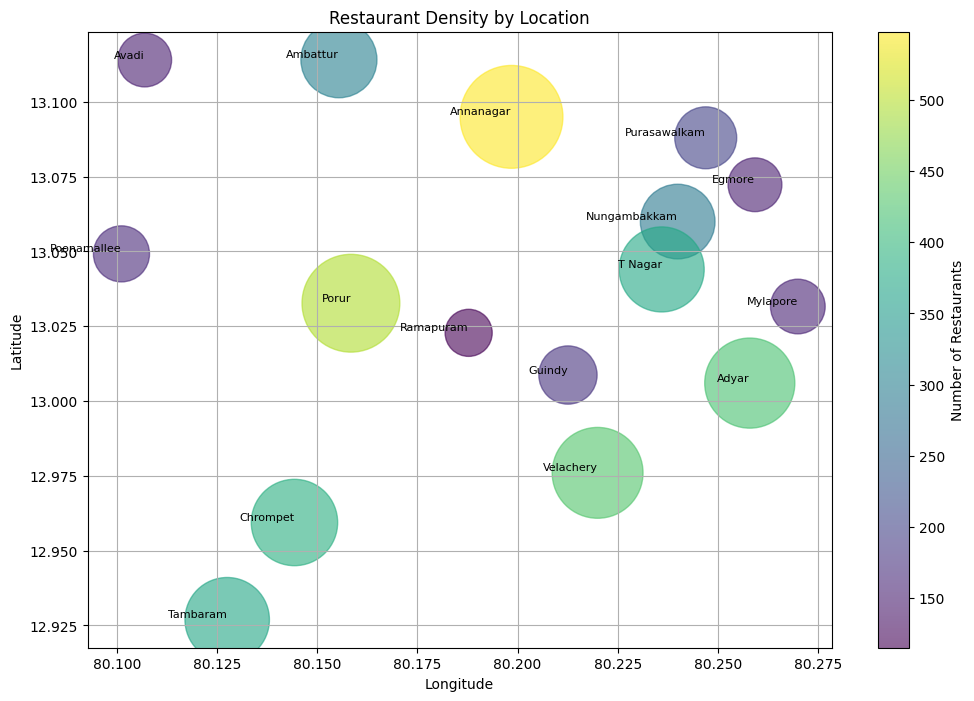

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = 'merged_data.xlsx'  # Replace with your file path
data = pd.read_excel(file_path)

# Extract latitude and longitude from the Coordinates column
data[['Latitude', 'Longitude']] = data['Coordinates'].str.split(',', expand=True).astype(float)

# Calculate the number of restaurants in each Location
restaurant_counts = data.groupby(['Location', 'Latitude', 'Longitude']).size().reset_index(name='Count')

# Plot the locations
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    restaurant_counts['Longitude'],
    restaurant_counts['Latitude'],
    s=restaurant_counts['Count'] * 10,  # Adjust the size multiplier as needed
    alpha=0.6,
    c=restaurant_counts['Count'],
    cmap='viridis'
)

for _, row in restaurant_counts.iterrows():
    plt.text(
        row['Longitude'],
        row['Latitude'],
        row['Location'],
        fontsize=8,
        ha='right',
        va='bottom'
    )

# Add a color bar
plt.colorbar(scatter, label='Number of Restaurants')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Restaurant Density by Location')
plt.grid(True)
plt.show()


In [5]:
!pip install folium

In [6]:
import folium
# Calculate restaurant density per location
location_counts = data.groupby('Location').size().reset_index(name='Restaurant Count')

# Extract latitude and longitude from coordinates
location_coords = data[['Location', 'Coordinates']].drop_duplicates()
location_coords[['Latitude', 'Longitude']] = location_coords['Coordinates'].str.split(',', expand=True)

# Merge counts with coordinates
location_density = pd.merge(location_counts, location_coords, on='Location')
location_density['Latitude'] = location_density['Latitude'].astype(float)
location_density['Longitude'] = location_density['Longitude'].astype(float)

# Plot on a map
map_density = folium.Map(location=[location_density['Latitude'].mean(), location_density['Longitude'].mean()], zoom_start=8)

for _, row in location_density.iterrows():
    folium.Circle(
        location=(row['Latitude'], row['Longitude']),
        radius=row['Restaurant Count'] * 50,  # Adjust radius multiplier
        color="blue",
        fill=True,
        fill_opacity=0.6,
        popup=f"{row['Location']}: {row['Restaurant Count']} restaurants"
    ).add_to(map_density)

map_density.save("restaurant_density_map.html")

In [7]:

# Extract Latitude and Longitude from 'Coordinates' column
data[['Latitude', 'Longitude']] = data['Coordinates'].str.split(',', expand=True)
data['Latitude'] = data['Latitude'].astype(float)
data['Longitude'] = data['Longitude'].astype(float)

# Calculate the density of restaurants per location
location_density = data.groupby('Location').agg(
    Latitude=('Latitude', 'mean'),
    Longitude=('Longitude', 'mean'),
    Restaurant_Count=('id', 'count')  # Assuming 'id' is unique for each restaurant
).reset_index()

# Plot on a map
map_density = folium.Map(location=[location_density['Latitude'].mean(), location_density['Longitude'].mean()], zoom_start=8)

for _, row in location_density.iterrows():
    folium.CircleMarker(
        location=(row['Latitude'], row['Longitude']),
        radius=row['Restaurant_Count'] / 10,  # Adjust radius for visualization
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        tooltip=f"{row['Location']} ({row['Restaurant_Count']} restaurants)"
    ).add_to(map_density)

# Display the map directly
map_density


In [8]:
print(location_density.columns)


Index(['Location', 'Latitude', 'Longitude', 'Restaurant_Count'], dtype='object')


In [9]:
# Calculate average cost per location
avg_cost = data.groupby('Location')['cost'].mean().reset_index()

# Merge with coordinates
cost_data = pd.merge(avg_cost, location_coords, on='Location')
cost_data['Latitude'] = cost_data['Latitude'].astype(float)
cost_data['Longitude'] = cost_data['Longitude'].astype(float)

# Plot average cost on the map
map_cost = folium.Map(location=[cost_data['Latitude'].mean(), cost_data['Longitude'].mean()], zoom_start=8)

for _, row in cost_data.iterrows():
    folium.CircleMarker(
        location=(row['Latitude'], row['Longitude']),
        radius=10,
        color="purple",
        fill=True,
        fill_opacity=0.6,
        popup=f"{row['Location']}: Avg. Cost = {row['cost']}"
    ).add_to(map_cost)

map_cost


In [10]:
# Group by location and calculate average cost
location_cost_analysis = data.groupby('Location').agg(
    Latitude=('Latitude', 'mean'),
    Longitude=('Longitude', 'mean'),
    Avg_Cost=('cost', 'mean')  # Average cost per location
).reset_index()

# Normalize the cost differences for better visualization
min_cost = location_cost_analysis['Avg_Cost'].min()
max_cost = location_cost_analysis['Avg_Cost'].max()
location_cost_analysis['Normalized_Cost'] = (location_cost_analysis['Avg_Cost'] - min_cost) / (max_cost - min_cost)

# Plot the map
map_cost = folium.Map(location=[location_cost_analysis['Latitude'].mean(), location_cost_analysis['Longitude'].mean()], zoom_start=8)

for _, row in location_cost_analysis.iterrows():
    folium.CircleMarker(
        location=(row['Latitude'], row['Longitude']),
        radius=row['Normalized_Cost'] * 20 + 5,  # Scale the radius (add a baseline size)
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity=0.6,
        tooltip=f"{row['Location']} (Avg Cost: ₹{row['Avg_Cost']:.2f})"
    ).add_to(map_cost)

# Display the map
map_cost


In [11]:
import folium
from IPython.display import display
import pandas as pd

# Group by location and calculate average cost
location_cost_analysis = data.groupby('Location').agg(
    Latitude=('Latitude', 'mean'),
    Longitude=('Longitude', 'mean'),
    Avg_Cost=('cost', 'mean')  # Average cost per location
).reset_index()

# Normalize the cost differences for better visualization
min_cost = location_cost_analysis['Avg_Cost'].min()
max_cost = location_cost_analysis['Avg_Cost'].max()
location_cost_analysis['Normalized_Cost'] = (location_cost_analysis['Avg_Cost'] - min_cost) / (max_cost - min_cost)

# Display the table of locations with costs
print("Location Cost Analysis Table")
display(location_cost_analysis[['Location', 'Avg_Cost', 'Latitude', 'Longitude', 'Normalized_Cost']])

# Plot the map
map_cost = folium.Map(location=[location_cost_analysis['Latitude'].mean(), location_cost_analysis['Longitude'].mean()], zoom_start=8)

for _, row in location_cost_analysis.iterrows():
    folium.CircleMarker(
        location=(row['Latitude'], row['Longitude']),
        radius=row['Normalized_Cost'] * 20 + 5,  # Scale the radius (add a baseline size)
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity=0.6,
        tooltip=f"{row['Location']} (Avg Cost: ₹{row['Avg_Cost']:.2f})"
    ).add_to(map_cost)

# Display the map
map_cost


Location Cost Analysis Table


,Location,Avg_Cost,Latitude,Longitude,Normalized_Cost
0,Adyar,319.209026,13.0060,80.2580,0.446441
1,Ambattur,270.700000,13.1141,80.1554,0.118036
2,Annanagar,345.330896,13.0950,80.1985,0.623285
3,Avadi,286.026667,13.1140,80.1069,0.221797
4,Chrompet,263.085271,12.9594,80.1443,0.066484
5,Egmore,356.993333,13.0723,80.2593,0.702240
6,Guindy,316.420455,13.0087,80.2126,0.427562
7,Mylapore,295.638710,13.0316,80.2700,0.286870
8,Nungambakkam,400.975779,13.0600,80.2400,1.000000
9,Poonamallee,264.269939,13.0492,80.1011,0.074504


In [ ]:
# Average rating by location
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')  # Convert ratings to numeric
avg_rating = data.groupby('Location')['rating'].mean().reset_index()

# Merge with coordinates
rating_data = pd.merge(avg_rating, location_coords, on='Location')
rating_data['Latitude'] = rating_data['Latitude'].astype(float)
rating_data['Longitude'] = rating_data['Longitude'].astype(float)

# Plot heatmap
import folium.plugins as plugins

map_rating = folium.Map(location=[rating_data['Latitude'].mean(), rating_data['Longitude'].mean()], zoom_start=8)
heat_data = [[row['Latitude'], row['Longitude'], row['rating']] for _, row in rating_data.iterrows()]
plugins.HeatMap(heat_data).add_to(map_rating)



In [ ]:
import pandas as pd
import folium
from folium.plugins import HeatMap

# Group by location for ratings analysis
location_ratings_analysis = data.groupby('Location').agg(
    Latitude=('Latitude', 'mean'),
    Longitude=('Longitude', 'mean'),
    Avg_Rating=('rating', 'mean'),  # Average rating per location
    Total_Ratings=('rating', 'count')  # Total number of ratings
).reset_index()

# Print numeric results for better understanding
print("Ratings Analysis by Location:")
print(location_ratings_analysis[['Location', 'Avg_Rating', 'Total_Ratings']])

# Normalize ratings for heat intensity
min_rating = location_ratings_analysis['Avg_Rating'].min()
max_rating = location_ratings_analysis['Avg_Rating'].max()
location_ratings_analysis['Normalized_Rating'] = (location_ratings_analysis['Avg_Rating'] - min_rating) / (max_rating - min_rating)

# Create a heatmap
map_ratings = folium.Map(location=[location_ratings_analysis['Latitude'].mean(), location_ratings_analysis['Longitude'].mean()], zoom_start=8)

# Add heat points
heat_data = location_ratings_analysis[['Latitude', 'Longitude', 'Normalized_Rating']].values.tolist()
HeatMap(heat_data, radius=20).add_to(map_ratings)

# Add location name labels
for _, row in location_ratings_analysis.iterrows():
    folium.Marker(
        location=(row['Latitude'], row['Longitude']),
        popup=f"{row['Location']} (Avg Rating: {row['Avg_Rating']:.2f}, Total Ratings: {row['Total_Ratings']})",
        icon=folium.Icon(color="blue", icon="info-sign")
    ).add_to(map_ratings)




Ratings Analysis by Location:
        Location  Avg_Rating  Total_Ratings
0          Adyar    4.218142            226
1       Ambattur    3.931579            114
2      Annanagar    4.128931            318
3          Avadi    3.930667             75
4       Chrompet    4.006977            172
5         Egmore    4.138824             85
6         Guindy    3.958696             92
7       Mylapore    4.227660             94
8   Nungambakkam    4.189535            172
9    Poonamallee    3.911111             81
10         Porur    3.945213            188
11  Purasawalkam    4.077528             89
12     Ramapuram    4.055882             68
13       T Nagar    4.163542            192
14      Tambaram    3.976129            155
15     Velachery    4.013559            236


In [ ]:
import pandas as pd
import folium
from folium.plugins import HeatMap

# Group by location for ratings analysis
location_ratings_analysis = data.groupby('Location').agg(
    Latitude=('Latitude', 'mean'),
    Longitude=('Longitude', 'mean'),
    Avg_Rating=('rating', 'mean'),  # Average rating per location
    Total_Ratings=('rating', 'count'),  # Total number of ratings
    Number_of_Restaurants=('Location', 'count')  # Number of restaurants per location
).reset_index()

# Print numeric results for better understanding
print("Ratings Analysis by Location:")
print(location_ratings_analysis[['Location', 'Avg_Rating', 'Total_Ratings', 'Number_of_Restaurants']])

# Normalize ratings for heat intensity
min_rating = location_ratings_analysis['Avg_Rating'].min()
max_rating = location_ratings_analysis['Avg_Rating'].max()
location_ratings_analysis['Normalized_Rating'] = (location_ratings_analysis['Avg_Rating'] - min_rating) / (max_rating - min_rating)

# Check normalized ratings to ensure range
print("Normalized Ratings Range:")
print(location_ratings_analysis['Normalized_Rating'].describe())

# Create a heatmap
map_ratings = folium.Map(location=[location_ratings_analysis['Latitude'].mean(), location_ratings_analysis['Longitude'].mean()], zoom_start=8)

# Add heat points
heat_data = location_ratings_analysis[['Latitude', 'Longitude', 'Normalized_Rating']].values.tolist()
HeatMap(
    heat_data,
    radius=30,  # Larger radius to make points more visible
    max_zoom=13,  # Adjust max zoom level
    min_opacity=0.4,  # Set minimum opacity for better visibility of all points
    blur=15,  # Adjust blur for smoother color transitions
    gradient={  # Custom gradient to improve color variance
        0.0: 'blue',
        0.5: 'lime',
        1.0: 'red'
    }
).add_to(map_ratings)

# Add location name labels with comparative results
for _, row in location_ratings_analysis.iterrows():
    folium.Marker(
        location=(row['Latitude'], row['Longitude']),
        popup=(
            f"{row['Location']} (Avg Rating: {row['Avg_Rating']:.2f}, "
            f"Total Ratings: {row['Total_Ratings']}, "
            f"Number of Restaurants: {row['Number_of_Restaurants']})"
        ),
        icon=folium.Icon(color="blue", icon="info-sign")
    ).add_to(map_ratings)

# Display the map
map_ratings


Ratings Analysis by Location:
        Location  Avg_Rating  Total_Ratings  Number_of_Restaurants
0          Adyar    4.218142            226                    421
1       Ambattur    3.931579            114                    300
2      Annanagar    4.128931            318                    548
3          Avadi    3.930667             75                    150
4       Chrompet    4.006977            172                    387
5         Egmore    4.138824             85                    150
6         Guindy    3.958696             92                    176
7       Mylapore    4.227660             94                    155
8   Nungambakkam    4.189535            172                    289
9    Poonamallee    3.911111             81                    163
10         Porur    3.945213            188                    496
11  Purasawalkam    4.077528             89                    199
12     Ramapuram    4.055882             68                    115
13       T Nagar    4.163542    

In [ ]:
# Find most common cuisine per location
data['cuisine_list'] = data['cuisine'].str.split(',')
top_cuisines = data.explode('cuisine_list').groupby(['Location', 'cuisine_list']).size().reset_index(name='Count')
top_cuisines = top_cuisines.loc[top_cuisines.groupby('Location')['Count'].idxmax()]

# Merge with coordinates
cuisine_data = pd.merge(top_cuisines, location_coords, on='Location')
cuisine_data['Latitude'] = cuisine_data['Latitude'].astype(float)
cuisine_data['Longitude'] = cuisine_data['Longitude'].astype(float)

# Annotate locations with top cuisine
map_cuisine = folium.Map(location=[cuisine_data['Latitude'].mean(), cuisine_data['Longitude'].mean()], zoom_start=8)

for _, row in cuisine_data.iterrows():
    folium.Marker(
        location=(row['Latitude'], row['Longitude']),
        popup=f"{row['Location']}: {row['cuisine_list']}"
    ).add_to(map_cuisine)

map_cuisine